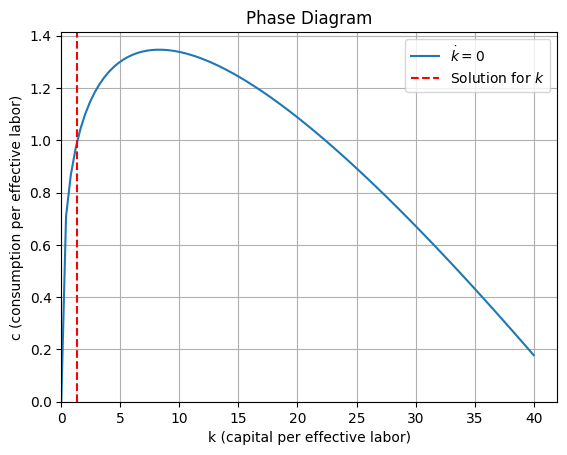

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# Parameters
alpha = 0.33
rho = 0.03
theta = 2.0
delta = 0.00
n = 0.04
g = 0.04
c = 1.0

# Production function per effective labor
def f(k):
    return k**alpha

# The equation to find the root
def equation(k):
    return k**alpha - (n + g + delta) * k - c

# Find the root for the k value where dot{k} = 0
k_initial_guess = 1.0
solution = root(equation, k_initial_guess)
k_solution = solution.x[0]

# Generate a grid of k values
k_vals = np.linspace(0, 40, 100)

# Find the values of c that satisfy the dot{k} = 0 and dot{c} = 0 equations
c_dotk_0 = f(k_vals) - (n + g + delta) * k_vals

# Plot the phase diagram
plt.plot(k_vals, c_dotk_0, label='$\\dot{k} = 0$')
plt.axvline(x=k_solution, color='red', linestyle='--', label='Solution for $k$')
plt.xlim(left=0)  # This sets the left bound of the x-axis to 0
plt.ylim(bottom=0)  # This sets the lower bound of the y-axis to 0

plt.xlabel('k (capital per effective labor)')
plt.ylabel('c (consumption per effective labor)')
plt.title('Phase Diagram')
plt.legend()
plt.grid()
plt.show()


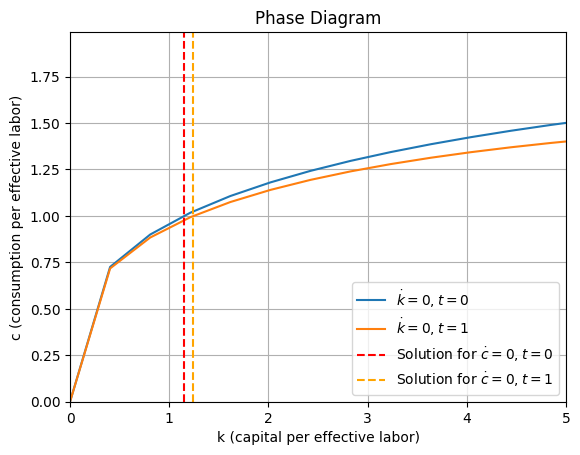

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# Parameters
alpha = 0.33
rho = 0.05
theta = 4.0
delta = 0.00
n = 0.02
g = 0.02
c = 1.0

# Production function per effective labor
def f(k):
    return k**alpha

# The equation to find the root
def equation(k):
    return k**alpha - (n + g + delta) * k - c

# Find the root for the k value where dot{k} = 0
k_initial_guess = 1.0
solution = root(equation, k_initial_guess)
k_solution = solution.x[0]

# Generate a grid of k values
k_vals = np.linspace(0, 40, 100)

# Find the values of c that satisfy the dot{k} = 0 and dot{c} = 0 equations
c_dotk_0 = f(k_vals) - (n + g + delta) * k_vals

# Find solutions for new parameters
g = .04
solution = root(equation, k_initial_guess)
k_line_solution = solution.x[0]
c_dotk_1 = f(k_vals) - (n + g + delta) * k_vals

# Plot the phase diagram
plt.plot(k_vals, c_dotk_0, label='$\\dot{k} = 0, t = 0$')
plt.plot(k_vals, c_dotk_1, label='$\\dot{k} = 0, t = 1$')
plt.axvline(x=k_solution, color='red', linestyle='--', label='Solution for $\dot{c}=0, t=0$')
plt.axvline(x=k_line_solution, color='orange', linestyle='--', label='Solution for $\dot{c}=0, t=1$')

# Reframing the chart to focus on the intersection
plt.xlim(left=0, right=5)
plt.ylim(bottom=0)

plt.xlabel('k (capital per effective labor)')
plt.ylabel('c (consumption per effective labor)')
plt.title('Phase Diagram')
plt.legend()
plt.grid()
plt.show()
